# El Método de Ritz. Ecuación de la Cuerda Vibrante.

Vibraciones de Sistemas Continuos
---------------------------------

Master Universitario de Estructuras
-----------------------------------

Curso 2015 - 2016
-----------------

*Autor: Alejandro E. Martínez Castro* ( email:amcastro@ugr.es )


----------------------------

Determinación mediante el método de Ritz de una aproximación a:
- Frecuencias naturales. 
- Formas modales.

en un problema de Cuerda Vibrante


## Definición del problema

### Solución analítica. 

In [1]:
from __future__ import division
%pylab inline 


#==============================================================================
# Parámetros de entrada
#==============================================================================
L = 1                # Longitud de cuerda, en m
Rho_v = 7.85E3       # Densidad volumétrica del material (kg/m3)
Diametro = 0.3048E-3 # Diámetro de la sección transversal (circular) en m
Tension = 13.39      # Tensión del hilo, en kp

#==============================================================================
# Parámetros de la cuerda vibrante
#==============================================================================

Area = np.pi * Diametro**2 / 4. 
Rho = Rho_v * Area # Densidad lineal de masa
Tens = Tension * 9.8 # Tensión del hilo en N

#==============================================================================
# # Número de modos a considerar
#==============================================================================

m = 3 ; 

#==============================================================================
# Frecuencias naturales
#==============================================================================
wm = np.zeros(m)     #    Inicialización del vector wm
im = np.linspace(1,m,m) # Inicialización de los valores de m, en vector

wm = im * np.pi / L * np.sqrt(Tens/Rho)# Definición de las wm
fm = wm / ( 2.* np.pi )

for i in range(m):
    print "Modo ", im[i].astype(int), "frecuencia (rad/s)" , wm[i]
print ""

for i in range(m):
    print "Modo ", im[i].astype(int), "frecuencia (Hz)" , fm[i]


Populating the interactive namespace from numpy and matplotlib
Modo  1 frecuencia (rad/s) 1503.69053937
Modo  2 frecuencia (rad/s) 3007.38107873
Modo  3 frecuencia (rad/s) 4511.0716181

Modo  1 frecuencia (Hz) 239.319782221
Modo  2 frecuencia (Hz) 478.639564441
Modo  3 frecuencia (Hz) 717.959346662


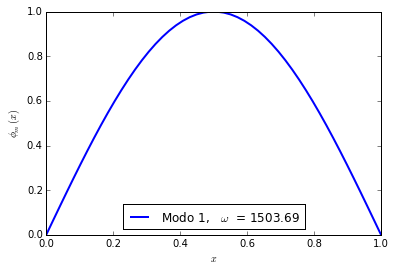

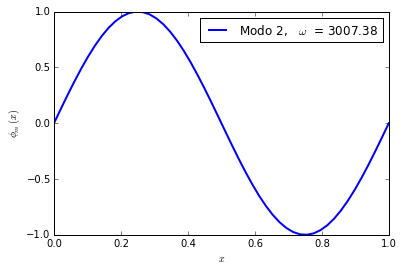

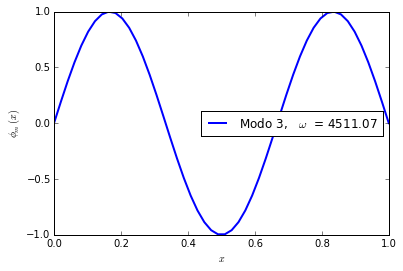

In [2]:
#==============================================================================
# Formas modales
#==============================================================================
Npuntos = 50           # Número de puntos para definir la figura
x = np.linspace(0,L,Npuntos)
im = im.astype(int)
for i in range (m):
    plt.figure()    
    fi_m = np.sin(im[i] * np.pi * x / L)
    
    leyenda = "Modo " + "%.0f" %  im[i] + ",   $\omega$  = " + "%.2f" % wm[i] 
    
    line, = plt.plot(x, fi_m, label = leyenda, linewidth = 2.0)

    plt.xlabel(r'$x$')                           #Etiqueta del eje x
    plt.ylabel(r'$\phi_m (x) $')                     #Etiqueta del eje y
    plt.axes()

    plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
    plt.show()         # Mostrar figura final

### Base polinómica

Para aproximar la solución, consideraremos una base de polinomios que cumpla las condiciones en $x=0$, $x=l$.  

Consideremos la base $\{1,x,x^2,x^3,x^4\}$.

Esta base, de 5 elementos, permite definir 5 polinomios, de grado 4, que forma una base, $P_m(x)$ (m=0,1,2,3,4) con las siguientes condición: 

$$P_m(x_i) = \delta_{mi} $$

siendo $\delta_{ij}$ la [Delta de Kroneker](https://es.wikipedia.org/wiki/Delta_de_Kronecker), con 

$$\delta_{mi} = \left\{\begin{matrix} 1 & \mbox{si } m=i \\ 0 & \mbox{si } m \ne i \end{matrix}\right.$$ 

Las abscisas $x_i$ se fijan en $x_i \in \lbrace 0, L, \dfrac{L}{2}, \dfrac{L}{4}, \dfrac{3 L}{4} \rbrace$

Estas funciones de forma permiten escribir una solución para la forma modal mediante la siguiente expansión: 

$$\phi_n (x) = \sum_{m=0}^{4} C_{m}^n \,P_m(x) $$

Nótese que, puesto que las funciones $P_0 (x)$ y $P_1(x)$ son funciones que valen 1 en $x=0$ y $x=L$, respectivamente, no debemos contar con ellas para formar una base que represente la solución de los modos de la cuerda vibrante. 

La solución que cumple las condiciones en $x=0$ y $x=L$ para el modo $n$ puede escribirse como: 

$$\phi_n (x) = \sum_{m=2}^{4} C_{m}^n \,P_m(x) $$

En lo que sigue se determinarán las expresiones de $P_m(x)$.

En primer lugar, formaremos una matriz cuadrada, que contiene por filas la evaluación de la base $\{1,x,x^2,x^3,x^4\}$ en los puntos $x_i$.

In [3]:
matcoef = np.matrix([[1, 0, 0, 0, 0 ],
                    [1, L, L**2, L**3, L**4],
                    [1, L/2, (L/2)**2, (L/2)**3, (L/2)**4],
                    [1, L/4, (L/4)**2, (L/4)**3, (L/4)**4],
                    [1, 3*L/4, (3*L/4)**2, (3*L/4)**3,(3*L/4)**4]])

Invirtiendo esta matriz, los coeficientes que definen la base $P_m(x)$ se pueden obtener leyendo por columnas la matriz inversa. 

In [4]:
coefs = matcoef.I # NOTA: Esta forma de invertir sólo funciona si matcoef es un objeto de tipo np.matrix

A continuación definiremos una función, para obtener $P_m(x)$.

In [5]:
def Pm(m,x):
    return coefs[0,m] + coefs[1,m]*x + coefs[2,m]*x**2 + coefs[3,m]*x**3 + coefs[4,m]*x**4

Definiremos también la derivada, ya que se requiere para aplicar el método de Ritz

In [6]:
def DPm(m,x):
    return coefs[1,m] + coefs[2,m]*2*x + coefs[3,m]*3*x**2 + coefs[4,m]*4*x**3

A continuación dibujaremos las 3 funciones de forma que van a emplearse en la aproximación. 
Consideraremos tres funciones, que vamos a denominar $f_0(x), f_1(x), f_2(x)$. Nótese que la relación con 
los polinomios $P_m(x)$ viene dada por: 

\begin{align}
f_0(x) & = P_2(x) \\
f_1(x) & = P_3(x) \\
f_2(x) & = P_4(x)
\end{align}

Como se indicó anteriormente, las funciones $P_0(x)$ y $P_1(x)$ no se van a incluir en la base, porque no cumplen
condiciones nulas en $x=0$, $x=L$. 

Definamos por tanto las funciones $f_m(x)$ y $f'_m(x)$, mediante su relación con $P_m(x)$ y $P'_m(x)$.

In [7]:
def fm(m,x):
    return Pm(m+2,x)

def Dfm(m,x):
    return DPm(m+2,x)

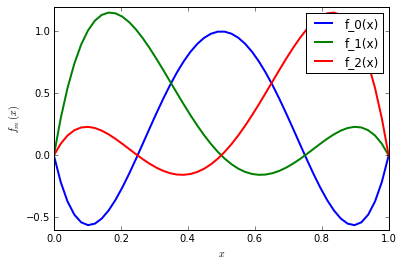

In [8]:
x = np.linspace(0,L,Npuntos)

plt.figure()
line, = plt.plot(x,fm(0,x), label = "f_0(x)", linewidth = 2.0)
line, = plt.plot(x,fm(1,x), label = "f_1(x)", linewidth = 2.0)
line, = plt.plot(x,fm(2,x), label = "f_2(x)", linewidth = 2.0)

plt.xlabel(r'$x$')                           #Etiqueta del eje x
plt.ylabel(r'$f_m (x) $')                    #Etiqueta del eje y
plt.axes()

plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
plt.show()  

Las tres funciones se anulan en $x=0$, $x=L$. Además, 
- La función $f_0(x)$ vale 1 en $x=L/2$, y 0 en $x=L/4$, $x=3L/4$.
- La función $f_1(x)$ vale 1 en $x=L/4$, y 0 en $x=L/2$, $x=3L/4$.
- La función $f_2(x)$ vale 1 en $x=3L/4$, y 0 en $x=L/2$, $x=L/4$.

## Método de Ritz

Considerando la base $f_0(x), f_1(x), f_2(x)$, la interpolación para el modo $\phi_m(x)$ se escribe como: 

$$\phi_n (x) = \sum_{m=0}^{2} C_{m}^n \,f_m(x) $$

El objetivo es encontrar los términos $C_{m}^n$.

El método de Ritz parte de la minimización del funcional

\begin{equation}
\mathcal{F} = \int_{t} ^{t+\tau} \int_{0}^L \left[ \dfrac{1}{2}\,\rho(x) \left(\dfrac{\partial w}{\partial t}\right)^2 - \dfrac{1}{2}\,T(x)\,\left( \dfrac{\partial w}{\partial x} \right)^2 \right] \mathrm{d} x\,\mathrm{d} t 
\end{equation}

siendo $\tau$ un tiempo en el que se considere la integración. Para vibraciones libres, y según se vio en el capítulo 2, esta integral afecta sólo a la variable espacial. Considerando una solución en variables separadas del tipo $w(x,t) = \phi(x) \,q(t)$, la ecuación para $\phi(x)$ queda: 

\begin{equation}
\mathcal{F}[x,\phi(x),\phi'(x)] = \int_{0}^{L} \left[ \dfrac{1}{2}\,\rho(x)\, \omega^2\,(\phi(x))^2 - \dfrac{1}{2}\,T(x)\,(\phi'(x))^2 \right] \mathrm{d} x
\end{equation}

Introduciendo la aproximación $\phi (x) = \sum_{m=0}^{2} C_{m} \,f_m(x) $, y minimizando la función resultante respecto a los coeficientes $C_{m}$, es posible escribir el problema mediante una formulación matricial. 

$$\left(\mathbf{A} - \omega^2 \,\mathbf{B}\right)\, \mathbf{C} = \mathbf{0} $$

Los coeficientes de estas matrices $\mathbf{A}$ y $\mathbf{B}$ se determinan mediante integración: 

\begin{align}
A_{ij} & = \int_0^L T(x)\,f'_i(x) \, f'_j(x) \,\mathrm{d} x \\
B_{ij} & = \int_0^L\rho(x)\, f_i(x)\,f_j(x)\,\mathrm{d} x 
\end{align}

En lo que sigue se determinarán estas matrices. La integración se realizará de forma numérica, mediante el método de la [cuadratura de Gauss](https://es.wikipedia.org/wiki/Cuadratura_de_Gauss).

En primer lugar, inicializaremos las matrices con 0.

In [9]:
matA = np.zeros([3,3])
matB = np.zeros([3,3])

Para integrar mediante el método de Gauss, teniendo en cuenta que

$$ \int_{0}^{L} f(x)\, \mathrm{d} x = \int_{-1}^{1} f(\xi) \,\dfrac{L}{2} \,\mathrm{d}\xi $$

Y que esta integral se puede evaluar de forma aproximada como: 

$$ \sum_{i=0}^{N-1} f(\xi_i)\,w_i \,\dfrac{L}{2} $$

Siendo $\xi_i$ y $w_i$ las abscisas y los pesos de una cuadratura de Gauss de $N$ puntos.

Una propiedad importante de esta integración es que la fórmula es exacta para un polinomio de grado $2N$. 

Puesto que el producto de dos polinomios de grado 4 es un polinomio de grado 8, estrictamente, empleando 4 puntos de Gauss, las integrales se evalúan de forma exacta. Tomaremos 5 puntos de Gauss para tener una cuadratura que incluya $x=L/2$. 

In [10]:
NPGauss = 5
pgauss = np.polynomial.legendre.leggauss(NPGauss)
        
pgauss

(array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]),
 array([ 0.23692689,  0.47862867,  0.56888889,  0.47862867,  0.23692689]))

Observe que se obtiene un objeto de tipo "tupla". 
- En la posición [0] se incluye un vector de numpy, con las abscisas $\xi_i$.
- En la posición [1], un vector de numpy con los pesos $w_i$.

In [11]:
print type(pgauss) #Le preguntamos a Python sobre "pgauss". ¿De qué tipo es?
print ""
print pgauss[0]
print type(pgauss[0])
print""
print pgauss[0]
print type(pgauss[0])

<type 'tuple'>

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
<type 'numpy.ndarray'>

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
<type 'numpy.ndarray'>


Cálculo de los valores de $x_i$ asociados a $\xi_i$.

Los valores de la abscisa correspondientes a los puntos de Gauss vienen determinados por la relación

$$x = \dfrac{L}{2} \,(\xi + 1)$$

In [12]:
xi = L/2 * (pgauss[0] + 1) # Observe cómo numpy convierte el 1 y xi en vectores de tipo np

In [13]:
xi

array([ 0.04691008,  0.23076534,  0.5       ,  0.76923466,  0.95308992])

In [14]:
for i in range(m):
    for j in range(m):
        for pg in range(NPGauss):
            matA[i,j] += Tens * Dfm(i,xi[pg]) * Dfm(j,xi[pg]) * pgauss[1][pg] * L / 2.

In [15]:
matA

array([[ 3099.33866667, -1972.91235556, -1972.91235556],
       [-1972.91235556,  2310.61807407,   817.60331852],
       [-1972.91235556,   817.60331852,  2310.61807407]])

Cálculo de la matriz $\mathbf{B}$

In [16]:
for i in range(m):
    for j in range(m):
        for pg in range(NPGauss):
            matB[i,j] += Rho * fm(i,xi[pg]) * fm(j,xi[pg]) * pgauss[1][pg] * L / 2.

In [17]:
matB

array([[  1.89109022e-04,  -3.87915943e-05,  -3.87915943e-05],
       [ -3.87915943e-05,   1.81027440e-04,   2.58610629e-05],
       [ -3.87915943e-05,   2.58610629e-05,   1.81027440e-04]])

Resolución del Problema de Valores Propios Generalizado $\left(\mathbf{A} - \omega^2 \,\mathbf{B}\right)\, \mathbf{C} = \mathbf{0} $

In [18]:
import scipy.linalg as LA


omega2, vectores = LA.eig(matA, matB)
wm_aprox = np.sqrt(omega2.real)

wm_aprox

array([ 4837.10809773,  1503.70160189,  3101.93890514])

In [19]:
#==============================================================================
# Ordenamos de menor a mayor
#==============================================================================

idx = wm_aprox.argsort()[::1]   

wm_aprox = wm_aprox[idx]
vectores = vectores[:,idx]

Comparemos los valores aproximados con los exactos para $\omega_m$. 

In [20]:
print "Modo        wm (exacto)      wm (aproximado)"
print "---------------------------------------------"
for i in range(m):
    print "   ", im[i],"    ", wm[i],"     ",wm_aprox[i].real  

Modo        wm (exacto)      wm (aproximado)
---------------------------------------------
    1      1503.69053937       1503.70160189
    2      3007.38107873       3101.93890514
    3      4511.0716181       4837.10809773


La matriz de vectores propios contiene por columnas los coeficientes que definen las formas modales

In [21]:
vectores

array([[ -7.06355881e-01,   6.19325790e-15,  -7.50809901e-01],
       [ -5.00530403e-01,  -7.07106781e-01,   4.67057005e-01],
       [ -5.00530403e-01,   7.07106781e-01,   4.67057005e-01]])

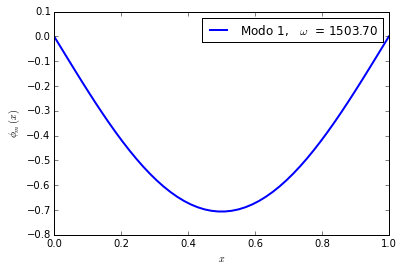

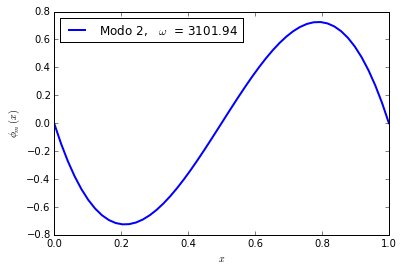

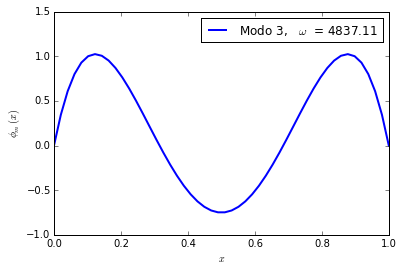

In [22]:
# Dibujo de las formas modales
#==============================================================================
# Formas modales
#==============================================================================
Npuntos = 50           # Número de puntos para definir la figura
x = np.linspace(0,L,Npuntos)
for i in range (m):
    plt.figure()   
    fi_m = np.zeros(Npuntos)
    fi_m = vectores[0,i]*fm(0,x) + vectores[1,i]*fm(1,x) + vectores[2,i]*fm(2,x)
    
    leyenda = "Modo " + "%.0f" %  im[i] + ",   $\omega$  = " + "%.2f" % wm_aprox[i] 
    
    line, = plt.plot(x, fi_m, label = leyenda, linewidth = 2.0)

    plt.xlabel(r'$x$')                           #Etiqueta del eje x
    plt.ylabel(r'$\phi_m (x) $')                     #Etiqueta del eje y
    plt.axes()

    plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
    plt.show()         # Mostrar figura final

### Dibujo comparativo de las formas modales

Las formas modales son funciones espaciales que no están acotadas. 

Para poder compararlas, debemos escalarlas de la misma forma. Observando las formas aproximadas con las exactas:
- El modo 1 y 2 aproximado difieren en el signo. 
- El modo 3 no difiere en la forma, pero sí en el signo. 

Además, las formas modales exactas tienen un máximo en 1, mientras que las aproximadas no. 

Comencemos comparando la forma modal 1

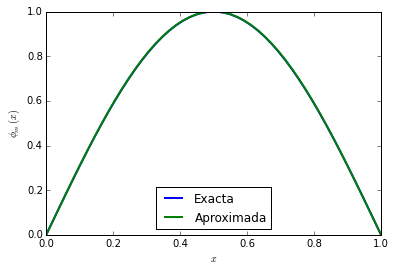

In [23]:
x = np.linspace(0,L,Npuntos)

plt.figure()   
i=0
faprox = np.zeros(Npuntos)
faprox = vectores[0,i]*fm(0,x) + vectores[1,i]*fm(1,x) + vectores[2,i]*fm(2,x)
    
faprox = - faprox /abs(min(faprox))
    
fexact = np.zeros(Npuntos)
fexact = np.sin(im[i] * np.pi * x / L)
    
    
line, = plt.plot(x, fexact, label = "Exacta", linewidth = 2.0)
line, = plt.plot(x, faprox, label = "Aproximada", linewidth = 2.0)

plt.xlabel(r'$x$')                           #Etiqueta del eje x
plt.ylabel(r'$\phi_m (x) $')                     #Etiqueta del eje y
plt.axes()

plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
plt.show()         # Mostrar figura final

La comparativa es casi exacta para el modo 1. Veamos para el modo 2

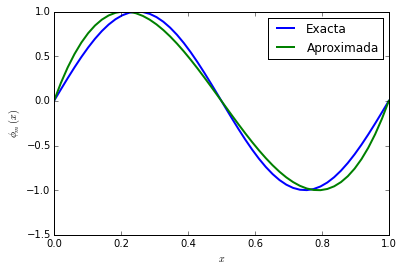

In [24]:
x = np.linspace(0,L,Npuntos)

plt.figure()   
i=1
faprox = np.zeros(Npuntos)
faprox = vectores[0,i]*fm(0,x) + vectores[1,i]*fm(1,x) + vectores[2,i]*fm(2,x)
    
faprox = - faprox /abs(min(faprox))
    
fexact = np.zeros(Npuntos)
fexact = np.sin(im[i] * np.pi * x / L)
    
    
line, = plt.plot(x, fexact, label = "Exacta", linewidth = 2.0)
line, = plt.plot(x, faprox, label = "Aproximada", linewidth = 2.0)

plt.xlabel(r'$x$')                           #Etiqueta del eje x
plt.ylabel(r'$\phi_m (x) $')                     #Etiqueta del eje y
plt.axes()

plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
plt.show()         # Mostrar figura final

Se observa pequeñas diferencias. Estas son debidas al error que se comete al aproximar la función

$$\sin(2\,\pi x / L) $$

por un polinomio. 

Finalmente, veamos la comparación en el modo 3. En este caso consideramos el máximo y el mismo signo.

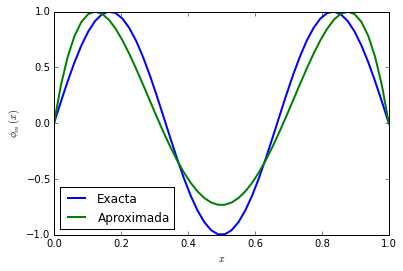

In [25]:
x = np.linspace(0,L,Npuntos)

plt.figure()   
i=2
faprox = np.zeros(Npuntos)
faprox = vectores[0,i]*fm(0,x) + vectores[1,i]*fm(1,x) + vectores[2,i]*fm(2,x)
    
faprox = faprox /abs(max(faprox))
    
fexact = np.zeros(Npuntos)
fexact = np.sin(im[i] * np.pi * x / L)
    
    
line, = plt.plot(x, fexact, label = "Exacta", linewidth = 2.0)
line, = plt.plot(x, faprox, label = "Aproximada", linewidth = 2.0)

plt.xlabel(r'$x$')                           #Etiqueta del eje x
plt.ylabel(r'$\phi_m (x) $')                     #Etiqueta del eje y
plt.axes()

plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
plt.show()         # Mostrar figura final

Vemos que en este caso los errores son mayores. La aproximación polinómica va cometiendo mayores errores en modos más altos.

# Experiencia de laboratorio. Video

A continuación se muestra una experiencia de laboratorio. Los datos de entrada son diferentes a los que se han tomado para este ejemplo del método de Ritz. No obstante, sirven para visualizar los modos y frecuencias en una cuerda vibrante por vía experimental. 

Observe que al excitar la cuerda con las frecuencias (en Hz) de los diferentes modos de vibración, la cuerda vibra según un modo aislado, y es posible así visualizarlo. 

Observe que las frecuencias de los diferntes modos son múltiplo entero de la frecuencia natural. 
* El modo fundamental tiene una frecuencia $f_1$ = 13.7 Hz.
* El modo 2 tiene una frecuencia $f_2 = 2 \cdot f_1$ = 27.4 Hz.
* El modo 3 tiene una frecuencia $f_3 = 3 \cdot f_1$ = 41.1 Hz.
* El modo 4 tiene una frecuencia $f_4 = 4 \cdot f_1$ = 54.8 Hz.
* El modo 5 tiene una frecuencia $f_5 = 5 \cdot f_1$ = 68.5 Hz.
* El modo 6 tiene una frecuencia $f_6 = 6 \cdot f_1$ = 82.2 Hz.

Se valida así por tanto la teoría con el experimento. 



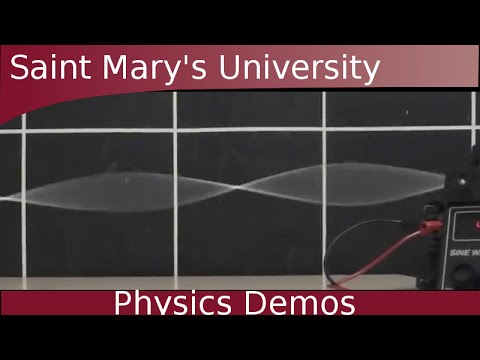

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('BSIw5SgUirg')